In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import wget
import os
import time
import random
import re
import warnings
warnings.filterwarnings('ignore')

# To download the data we need to specify a wget string with city ID and year we want
### Lets make a list of configuration dictionaries with the necessary information.
1. Make a dictionary of the city with its identification code.
1. Make a list of years we are interested in. 
2. Loop through the city-code dictionary items and the list of years.
3. Save config dictionary from loop into "results" list

In [22]:
# create dictionary with city and city code
city_dict = {"Calgary": 50430}

# what are the years you are interested in?

list_of_years = [2022]

# create config dictionaries and save to result list
result = []
for city, city_code in city_dict.items():
    for year in list_of_years:
        result.append({"City": city, "City_Code": city_code, "year": year})

result

[{'City': 'Calgary', 'City_Code': 50430, 'year': 2022}]

# To download the file, the https link follow this format with user defined "stationID" and "year":
- "https://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID={stationID}&Year={year}&Month=1&Day=1&timeframe=2&submit=Download+Data"

## We will use wget to fetch the data stored in the variable "http_str" and save to a specific .csv file called by the variable "data_file". The wget format is:
- wget -O "{data_file}" --content-disposition "{http_str}"

In [10]:

city, stationID, year = result[0]['City'],result[0]['City_Code'],result[0]['year']

http_str = f"https://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID={stationID}&Year={year}&Month=1&Day=1&timeframe=2&submit=Download+Data"
    
data_file = f'{city}_{year}.csv'

wget_str = f'wget -O "{data_file}" --content-disposition "{http_str}"'


In [11]:

print(f'the http link is: {http_str}')

print('-------')

print(f'the data will be stored in the directory you run the script with filename: {data_file}')

print('-------')

print(f'the wget string is: {wget_str}')

the http link is: https://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=50430&Year=2022&Month=1&Day=1&timeframe=2&submit=Download+Data
-------
the data will be stored in the directory you run the script with filename: Calgary_2022.csv
-------
the wget string is: wget -O "Calgary_2022.csv" --content-disposition "https://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=50430&Year=2022&Month=1&Day=1&timeframe=2&submit=Download+Data"


# Lets create a function called "download data" that takes an entry (config dictionary) from the result list, creates the previous variables, and then uses os.system to execute the wget string.
### Also, lets through in some random sleep time to prevent IP blocking for too fast of request to the server

In [ ]:
def download_data(entry):

    # identify the variables for each entry
    city,stationID, year = entry['City'], entry['City_Code'], entry['year']

    # use f-strings to input the variables "stationID" and "year" to the http link
    http_str = f"https://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID={stationID}&Year={year}&Month=1&Day=1&timeframe=2&submit=Download+Data"
    
    # establish the output file name
    data_file = f'{city}_{year}.csv'

    # create the wget link specifying the output file name with the -O flag
    wget_str = f'wget -O "{data_file}" --content-disposition "{http_str}"'

    # select a random interger (seconds) for the process to sleep 
    sleep_time = random.randint(1, 3)

    # sleep the script 
    time.sleep(sleep_time)

    # use os.system to run the wget command
    os.system(wget_str)

    # return the datafile name

    return(data_file)

In [ ]:
# download the data and return a list of the data file names that have been downloaded
data_downloaded_list = [download_data(entry) for entry in result]

print(f'files that have been downloaded are: {data_downloaded_list}')

--2024-11-28 11:01:30--  https://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=50430&Year=2022&Month=1&Day=1&timeframe=2&submit=Download+Data
Resolving climate.weather.gc.ca (climate.weather.gc.ca)... 205.189.10.46
Connecting to climate.weather.gc.ca (climate.weather.gc.ca)|205.189.10.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/force-download]
Saving to: ‘Calgary_2022.csv’

     0K .......... .......... .......... ..

files that have been downloaded are: ['Calgary_2022.csv']


........ ..........  193K
    50K .......... ...                                          264K=0.3s

2024-11-28 11:01:32 (244 KB/s) - ‘Calgary_2022.csv’ saved [64725]



In [ ]:
# the file has been downloaded, lets look at it.

test_file_name = data_downloaded_list[0]

# open the csv file as a pandas dataframe
downloaded_file_df = pd.read_csv(test_file_name)

# look at the first 5 rows of the dataframe
downloaded_file_df.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-114.01,51.12,CALGARY INTL A,3031092,2022-01-01,2022,1,1,NaN,-0.3,...,0.0,NaN,0.0,NaN,8.0,NaN,27.0,NaN,68.0,NaN
1,-114.01,51.12,CALGARY INTL A,3031092,2022-01-02,2022,1,2,NaN,1.4,...,0.2,NaN,0.2,NaN,9.0,E,25.0,NaN,73.0,NaN
2,-114.01,51.12,CALGARY INTL A,3031092,2022-01-03,2022,1,3,NaN,-14.7,...,0.6,NaN,0.4,NaN,9.0,NaN,35.0,NaN,45.0,NaN
3,-114.01,51.12,CALGARY INTL A,3031092,2022-01-04,2022,1,4,NaN,-24.4,...,2.3,NaN,2.0,NaN,9.0,NaN,33.0,NaN,54.0,NaN
4,-114.01,51.12,CALGARY INTL A,3031092,2022-01-05,2022,1,5,NaN,-24.1,...,0.0,T,0.0,T,9.0,NaN,NaN,M,NaN,M


In [ ]:
# what are the columns available?

downloaded_file_df.columns

Index(['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID',
       'Date/Time', 'Year', 'Month', 'Day', 'Data Quality', 'Max Temp (°C)',
       'Max Temp Flag', 'Min Temp (°C)', 'Min Temp Flag', 'Mean Temp (°C)',
       'Mean Temp Flag', 'Heat Deg Days (°C)', 'Heat Deg Days Flag',
       'Cool Deg Days (°C)', 'Cool Deg Days Flag', 'Total Rain (mm)',
       'Total Rain Flag', 'Total Snow (cm)', 'Total Snow Flag',
       'Total Precip (mm)', 'Total Precip Flag', 'Snow on Grnd (cm)',
       'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)',
       'Dir of Max Gust Flag', 'Spd of Max Gust (km/h)',
       'Spd of Max Gust Flag'],
      dtype='object')

# Lets modify the columns to make the dataframe more user friendly

In [27]:
# Function to clean column names
def prep_df(this_file):

    df = pd.read_csv(this_file)

    def clean_column_name(col_name):
        # Find and capture any units in parentheses
        match = re.search(r'\((.*?)\)', col_name)
        unit = match.group(1) if match else ''
        
        # Remove the units in parentheses from the original column name
        col_name = re.sub(r'\s?\(.*\)', '', col_name)
        
        # Convert to lowercase and replace spaces with underscores
        col_name = col_name.lower().replace(' ', '_')
        
        # Remove the degree sign (°) if it exists
        col_name = col_name.replace('°', '')
        
        # Replace km/h with kmh (remove the slash)
        col_name = col_name.replace('km/h', 'kmh')
        
        # If a unit was found, append it with an underscore to the column name
        if unit:
            # Remove any degree signs or symbols from the unit itself
            unit = unit.replace('°', '')
            unit = unit.replace('/', '')  # Remove any slashes from the unit
            col_name = f"{col_name}_{unit}"
        
        return(col_name)

    # Apply the function to all column names
    df.columns = [clean_column_name(col) for col in df.columns]

    df.rename(columns={'dir_of_max_gust_10s deg': 'dir_of_max_gust_10s_deg'}, inplace=True)

    df.rename(columns={'date/time': 'date_time'}, inplace=True)

    # convert date_time column into a python date-time object with timezone UTC
    df['date_time'] = [pd.Timestamp(this_str_date_time, tz = 'utc') for this_str_date_time in df['date_time']]

    # return the yearly dataframe with the column names modified
    return(df)


In [29]:
df_list_col_prepped = [prep_df(this_file) for this_file in data_downloaded_list]
df_list_col_prepped[0].columns

Index(['longitude_x', 'latitude_y', 'station_name', 'climate_id', 'date_time',
       'year', 'month', 'day', 'data_quality', 'max_temp_C', 'max_temp_flag',
       'min_temp_C', 'min_temp_flag', 'mean_temp_C', 'mean_temp_flag',
       'heat_deg_days_C', 'heat_deg_days_flag', 'cool_deg_days_C',
       'cool_deg_days_flag', 'total_rain_mm', 'total_rain_flag',
       'total_snow_cm', 'total_snow_flag', 'total_precip_mm',
       'total_precip_flag', 'snow_on_grnd_cm', 'snow_on_grnd_flag',
       'dir_of_max_gust_10s_deg', 'dir_of_max_gust_flag',
       'spd_of_max_gust_kmh', 'spd_of_max_gust_flag'],
      dtype='object')

# We've normalized the columns names. Let's look at the temperature data.

Text(0.5, 0, 'date_time')

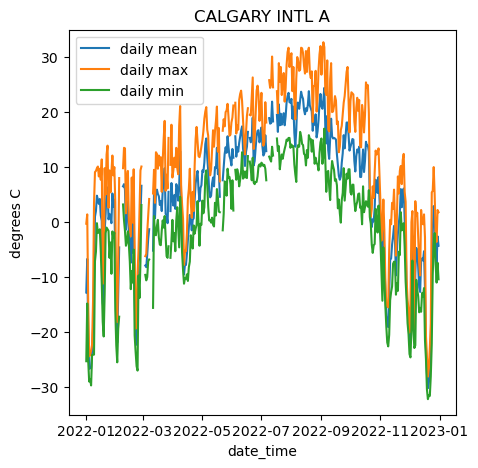

In [34]:
plot_df = df_list_col_prepped[0]

fig = plt.figure(figsize = (5,5))

ax = fig.add_subplot(1,1,1)

ax.plot(plot_df.date_time, plot_df.mean_temp_C, label = 'daily mean')

ax.plot(plot_df.date_time,plot_df.max_temp_C, label  = 'daily max')

ax.plot(plot_df.date_time,plot_df.min_temp_C, label = 'daily min')

ax.legend()

ax.set_title(plot_df.station_name.iloc[0])
ax.set_ylim(-35,35)
ax.set_ylabel('degrees C')
ax.set_xlabel('date_time')

# lets write a function to take in a dataframe, find all the data for a specific month, calculate the temperature avearge and save to that dataframe

In [35]:

def calculate_monthly_avgs(df):

    copy_df = df.copy()

    output_df_list = []

    for this_month in copy_df.month.unique():

        mask = copy_df[copy_df.month == this_month]

        mask['avg_max_temp_C'] = mask.max_temp_C.mean()

        mask['avg_min_temp_C'] = mask.min_temp_C.mean()

        mask['avg_mean_temp_C'] = mask.mean_temp_C.mean()

        output_df_list.append(mask)
    
    return(pd.concat(output_df_list))

In [36]:
new_df = pd.concat([calculate_monthly_avgs(this_df) for this_df in df_list_col_prepped]).reset_index(drop = True)

new_df.columns

Index(['longitude_x', 'latitude_y', 'station_name', 'climate_id', 'date_time',
       'year', 'month', 'day', 'data_quality', 'max_temp_C', 'max_temp_flag',
       'min_temp_C', 'min_temp_flag', 'mean_temp_C', 'mean_temp_flag',
       'heat_deg_days_C', 'heat_deg_days_flag', 'cool_deg_days_C',
       'cool_deg_days_flag', 'total_rain_mm', 'total_rain_flag',
       'total_snow_cm', 'total_snow_flag', 'total_precip_mm',
       'total_precip_flag', 'snow_on_grnd_cm', 'snow_on_grnd_flag',
       'dir_of_max_gust_10s_deg', 'dir_of_max_gust_flag',
       'spd_of_max_gust_kmh', 'spd_of_max_gust_flag', 'avg_max_temp_C',
       'avg_min_temp_C', 'avg_mean_temp_C'],
      dtype='object')

# 

('CALGARY INTL A', 2022)


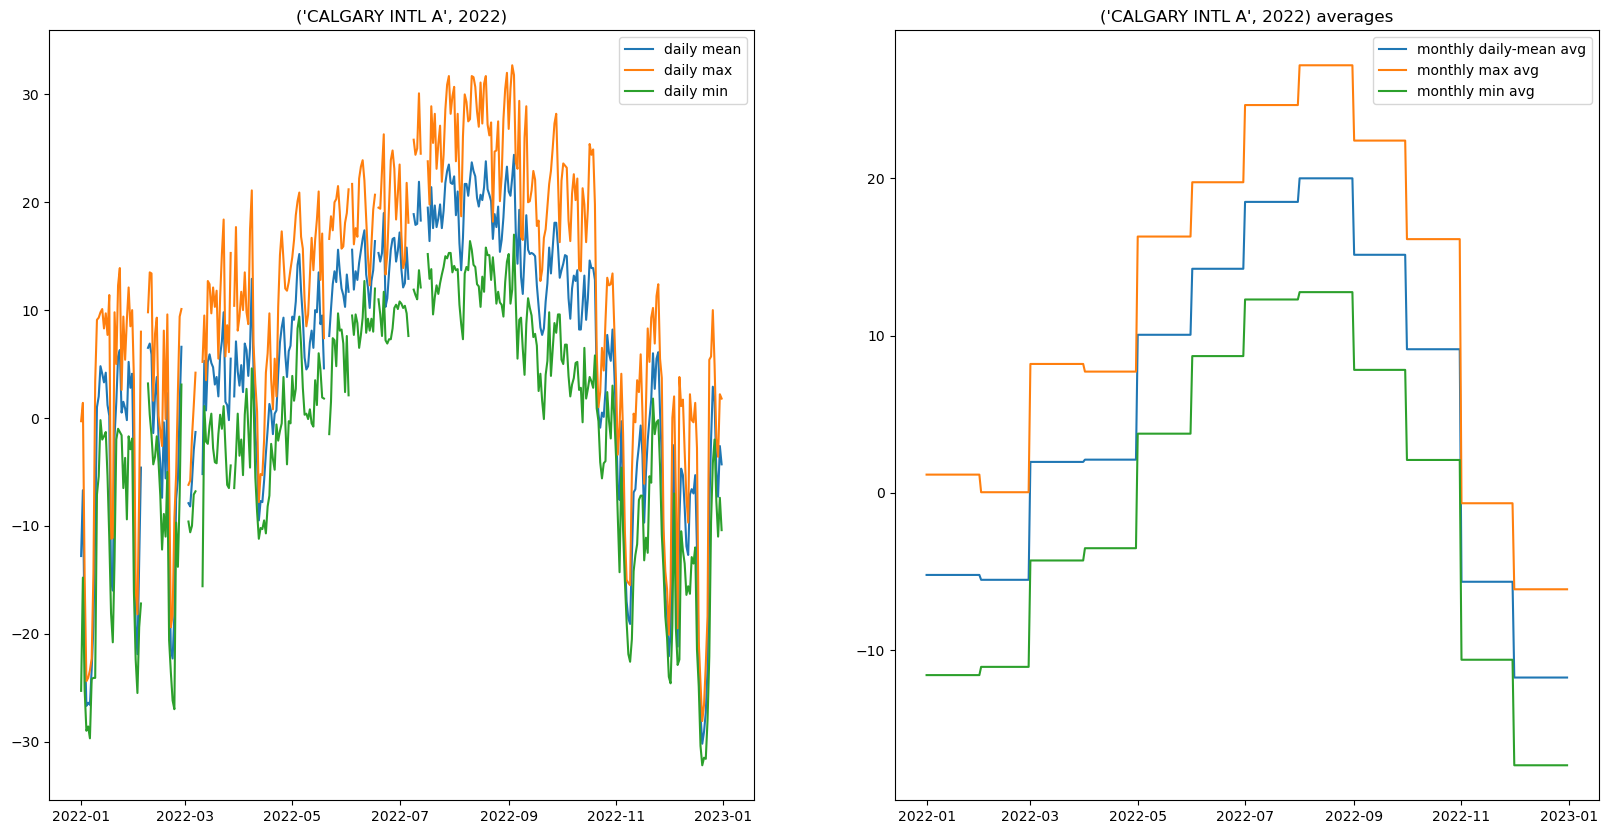

In [37]:
for label, group in new_df.groupby(['station_name','year']):

    fig = plt.figure(figsize = (20,10))

    ax = fig.add_subplot(1,2,1)

    ax2 = fig.add_subplot(1,2,2)

    ax.plot(group.date_time, group.mean_temp_C, label = 'daily mean')

    ax.plot(group.date_time,group.max_temp_C, label  = 'daily max')

    ax.plot(group.date_time,group.min_temp_C, label = 'daily min')

    ax2.plot(group.date_time,group.avg_mean_temp_C, label = 'monthly daily-mean avg')
    ax2.plot(group.date_time,group.avg_max_temp_C, label = 'monthly max avg')
    ax2.plot(group.date_time,group.avg_min_temp_C, label = 'monthly min avg')
    

    ax.set_title(label)
    ax.legend()

    ax2.set_title(f'{label} averages')
    ax2.legend()

    print(label)

# ax.plot(df.total_snow_cm)

# In essence, our final script will consist of 3 parts:
1. Downloading the data
1. Re-structuring the column names
1. Calculating the mean
1. Plotting the results

In [ ]:
# (5*10**6 * 10**-3)/60

83.33333333333333